# Question 2


#### 1.Number of samples = 400; class means $[0,0]^{T}$ and $[3,3]^{T}$; class covariance matrices both set to I; equal class priors


In [48]:
# Generating the number of Samples
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.5])
n2=len([i for i in l if i <= 0.5])
print(n1,n2)

202 198


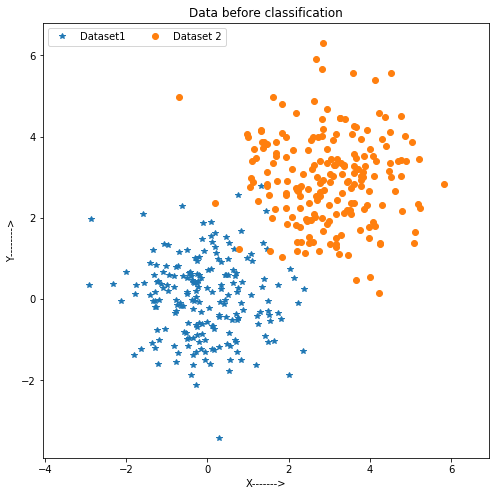

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math

plt.figure(figsize=(8,8))

mu1=[0,0];
mu2=[3,3];
cov=[[1,0],[0,1]]

N=400;

#generating the recquired samples using linear transformation techniques.

def linear_transformation(mu, cov, n):
    mean=[0,0]
    covariance=[[1,0],[0,1]]
    
    
    z = np.random.multivariate_normal(mean,covariance,n).T
    b = mu
    A = np.linalg.cholesky(cov)
    
    x=np.dot(A,z)
    
    for i in range(0,n):
        x[:,i]=x[:,i]+b
    
    return x

x1=linear_transformation(mu1,cov,n1)
x1_axis=x1[0,:]
y1_axis=x1[1,:]

x2=linear_transformation(mu2,cov,n2)
x2_axis=x2[0,:]
y2_axis=x2[1,:]

plt.plot(x1_axis,y1_axis,'*',label='Dataset1');
plt.plot(x2_axis,y2_axis,'o',label ='Dataset 2')
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()



In [50]:

def pdf(x, mu, cov):
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( math.pow((2*np.pi),float(2)/2) * math.pow(det,1.0/2) )
    x_mu = np.matrix(x - mu)
    inv = cov.I
    result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
    return norm_const * result


#### MAP classifier 
 1. with equal class priors
 

Misclassifications of Dataset1 =  3
Misclassifications of Dataset2 =  4
probabilty of error  0.0175


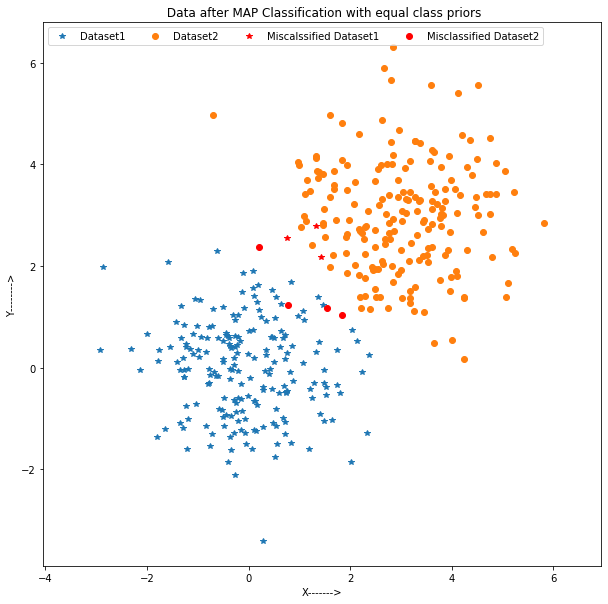

In [52]:
plt.figure(figsize=(10,10))
error1=[]
error2=[]

res1=[]
res2=[]

#Classification 
for i in range(n1):
    if(pdf(np.matrix(x1[:,i]), mu1, np.matrix(cov)) > pdf(np.matrix(x1[:,i]), mu2, np.matrix(cov)) ):
        res1.append(x1[:,i])
    else:
        error1.append(x1[:,i])
        
for i in range(n2):
    if(pdf(np.matrix(x2[:,i]), mu2, np.matrix(cov)) > pdf(np.matrix(x2[:,i]), mu1, np.matrix(cov)) ):
        res2.append(x2[:,i])
    else:
        error2.append(x2[:,i])

#Calculating the error
P_error=(len(error1)+len(error2))/400
print("Misclassifications of Dataset1 = ", len(error1))
print("Misclassifications of Dataset2 = ", len(error2))
print("probabilty of error ", P_error)

def column(matrix, i):
    return [row[i] for row in matrix]

plt.plot(column(res1,0),column(res1,1),'*',label='Dataset1');
plt.plot(column(res2,0),column(res2,1),'o',label='Dataset2');
plt.plot(column(error1,0),column(error1,1),'*',color='r',label='Miscalssified Dataset1');
plt.plot(column(error2,0),column(error2,1),'o',color='r',label='Misclassified Dataset2');
plt.axis('equal')
plt.title(" Data after MAP Classification with equal class priors")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()



#### 2. All parameters same as (1), but both covariance matrices changed to [3,1; 1,0.8]

In [71]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.5])
n2=len([i for i in l if i <= 0.5])
print(n1,n2)

197 203


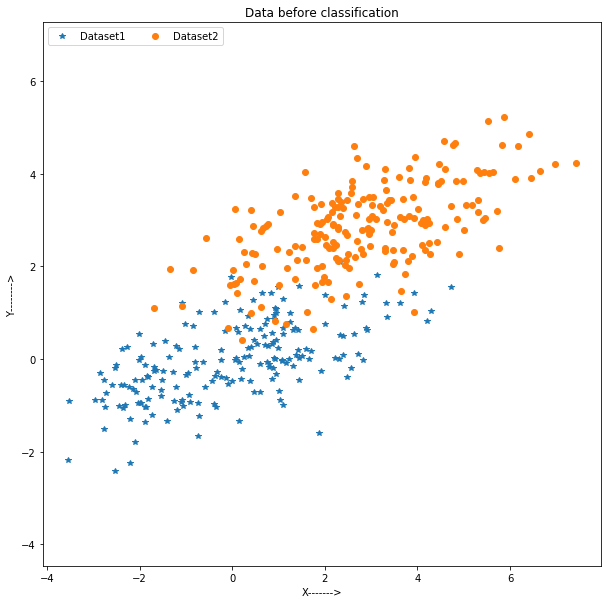

In [72]:
cov2=[[3,1],[1,0.8]]
plt.figure(figsize=(10,10))

x3=linear_transformation(mu1,cov2,n1)
x3_axis=x3[0,:]
y3_axis=x3[1,:]

x4=linear_transformation(mu2,cov2,n2)
x4_axis=x4[0,:]
y4_axis=x4[1,:]

plt.plot(x3_axis,y3_axis,'*',label='Dataset1');
plt.plot(x4_axis,y4_axis,'o',label='Dataset2');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()


#### Map Classifier

  1. With equal Class Priors


In [ ]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.5])
n2=len([i for i in l if i <= 0.5])
print(n1,n2)

Misclassifications of Dataset 1 = 6
Misclassifications of Dataset 2 = 15
probabilty of error  0.0525


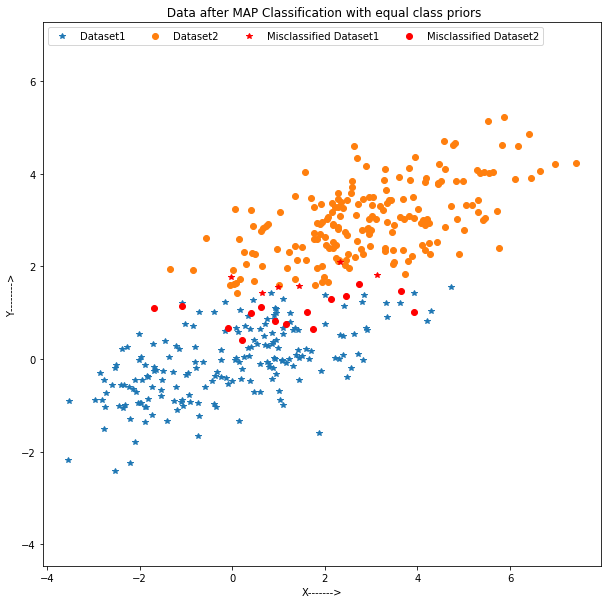

In [73]:
plt.figure(figsize=(10,10))
error3=[]
error4=[]

res3=[]
res4=[]

for i in range(n1):
    if(pdf(np.matrix(x3[:,i]), mu1, np.matrix(cov2)) > pdf(np.matrix(x3[:,i]), mu2, np.matrix(cov2)) ):
        res3.append(x3[:,i])
    else:
        error3.append(x3[:,i])
        
for i in range(n2):
    if(pdf(np.matrix(x4[:,i]), mu2, np.matrix(cov2)) > pdf(np.matrix(x4[:,i]), mu1, np.matrix(cov2)) ):
        res4.append(x4[:,i])
    else:
        error4.append(x4[:,i])
        
P_error=(len(error3)+len(error4))/400
print("Misclassifications of Dataset 1 =", len(error3))
print("Misclassifications of Dataset 2 =", len(error4))
print("probabilty of error ", P_error)

def column(matrix, i):
    return [row[i] for row in matrix]

plt.plot(column(res3,0),column(res3,1),'*',label='Dataset1');
plt.plot(column(res4,0),column(res4,1),'o',label='Dataset2');
plt.plot(column(error3,0),column(error3,1),'*',color='r',label='Misclassified Dataset1');
plt.plot(column(error4,0),column(error4,1),'o',color='r',label='Misclassified Dataset2');
plt.axis('equal')
plt.title(" Data after MAP Classification with equal class priors")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

#### 3. Number of samples = 400; class means $[0,0]^{T}$ and $[2,2]^{T}$; class covariance matrices $[2,0.5; 0.5,1]$ and $[2,−1.9;−1.9,5]$; equal class priors.

In [89]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.5])
n2=len([i for i in l if i <= 0.5])
print(n1,n2)

172 228


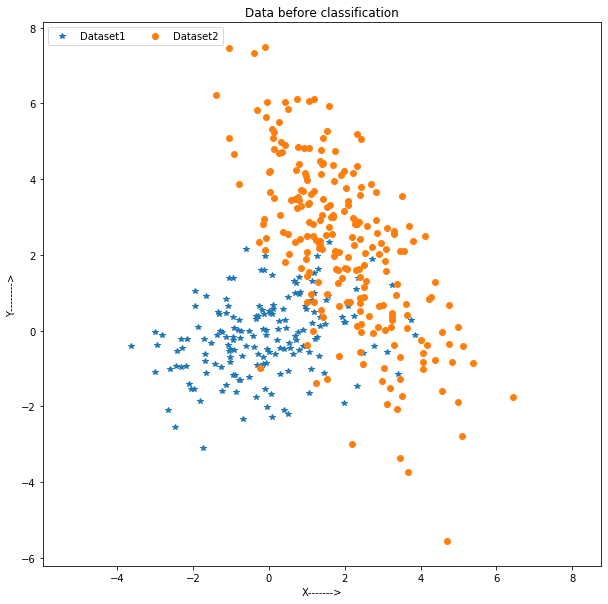

In [90]:
plt.figure(figsize=(10,10))
mu1=[0,0]
mu2=[2,2]

cov1=[[2,0.5],[0.5,1]]
cov2=[[2,-1.9],[-1.9,5]]

x5=linear_transformation(mu1,cov1,n1)
x5_axis=x5[0,:]
y5_axis=x5[1,:]

x6=linear_transformation(mu2,cov2,n2)
x6_axis=x6[0,:]
y6_axis=x6[1,:]

plt.plot(x5_axis,y5_axis,'*',label='Dataset1');
plt.plot(x6_axis,y6_axis,'o',label='Dataset2');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

Map Classifier with equal priors

Misclassifications of Dataset 1 = 32
Misclassifications of Dataset 2 = 20
probabilty of error  0.13


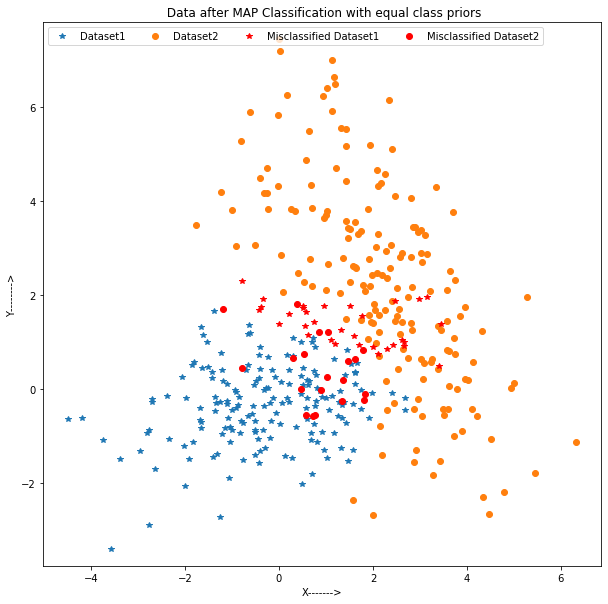

In [99]:


plt.figure(figsize=(10,10))
error5=[]
error6=[]

res5=[]
res6=[]

for i in range(n1):
    if(pdf(np.matrix(x5[:,i]), mu1, np.matrix(cov1)) > pdf(np.matrix(x5[:,i]), mu2, np.matrix(cov1)) ):
        res5.append(x5[:,i])
    else:
        error5.append(x5[:,i])
        
for i in range(n2):
    if(pdf(np.matrix(x6[:,i]), mu2, np.matrix(cov2)) > pdf(np.matrix(x6[:,i]), mu1, np.matrix(cov1)) ):
        res6.append(x6[:,i])
    else:
        error6.append(x6[:,i])
        
P_error=(len(error5)+len(error6))/400
print("Misclassifications of Dataset 1 =", len(error5))
print("Misclassifications of Dataset 2 =", len(error6))
print("probabilty of error ", P_error)

def column(matrix, i):
    return [row[i] for row in matrix]

plt.plot(column(res5,0),column(res5,1),'*',label='Dataset1');
plt.plot(column(res6,0),column(res6,1),'o',label='Dataset2');
plt.plot(column(error5,0),column(error5,1),'*',color='r',label='Misclassified Dataset1');
plt.plot(column(error6,0),column(error6,1),'o',color='r',label='Misclassified Dataset2');
plt.axis('equal')
plt.title(" Data after MAP Classification with equal class priors")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

  ### Map Classiffier with Unequal Class priors
  #### 4. Same (1), but prior for class priors are 0.05 and 0.95.


In [61]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.95])
n2=len([i for i in l if i <= 0.95])
print(n1,n2)

15 385


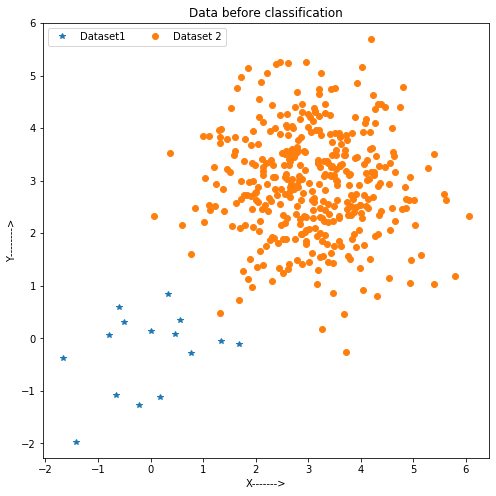

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math

plt.figure(figsize=(8,8))

mu1=[0,0];
mu2=[3,3];
cov=[[1,0],[0,1]]

N=400;
#generating the recquired samples using linear transformation techniques.

def linear_transformation(mu, cov, n):
    mean=[0,0]
    covariance=[[1,0],[0,1]]
    
    
    z = np.random.multivariate_normal(mean,covariance,n).T
    b = mu
    A = np.linalg.cholesky(cov)
    
    x=np.dot(A,z)
    
    for i in range(0,n):
        x[:,i]=x[:,i]+b
    
    return x

x1=linear_transformation(mu1,cov,n1)
x1_axis=x1[0,:]
y1_axis=x1[1,:]

x2=linear_transformation(mu2,cov,n2)
x2_axis=x2[0,:]
y2_axis=x2[1,:]

plt.plot(x1_axis,y1_axis,'*',label='Dataset1');
plt.plot(x2_axis,y2_axis,'o',label ='Dataset 2')
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()



Misclassifications of Dataset1 =  0
Misclassifications of Dataset2 =  1
probabilty of error  0.0025


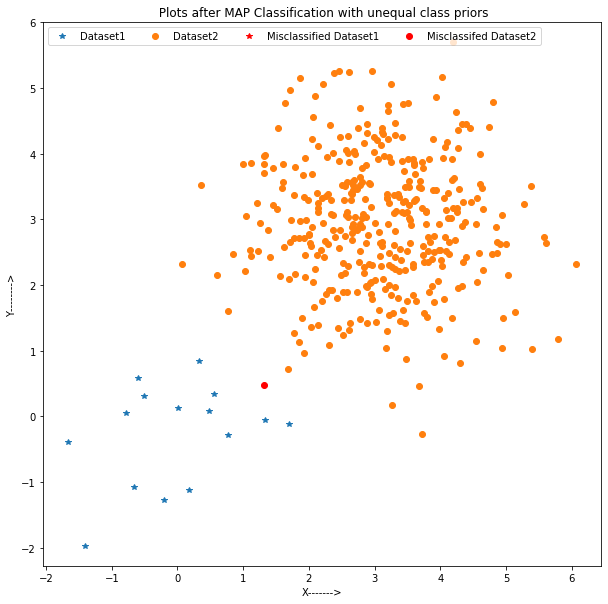

In [63]:
plt.figure(figsize=(10,10))
cov =[[1,0],[0,1]]
pw1=0.05
pw2=0.95
error1=[]
error2=[]

res1=[]
res2=[]

for i in range(n1):
    if(pdf(np.matrix(x1[:,i]), mu1, np.matrix(cov))*pw1 > pdf(np.matrix(x1[:,i]), mu2, np.matrix(cov))*pw2 ):
        res1.append(x1[:,i])
    else:
        error1.append(x1[:,i])
        
for i in range(n2):
    if(pdf(np.matrix(x2[:,i]), mu2, np.matrix(cov))*pw2 > pdf(np.matrix(x2[:,i]), mu1, np.matrix(cov))*pw1 ):
        res2.append(x2[:,i])
    else:
        error2.append(x2[:,i])
        
P_error=(len(error1)+len(error2))/400
print("Misclassifications of Dataset1 = ", len(error1))
print("Misclassifications of Dataset2 = ", len(error2))
print("probabilty of error ", P_error)

def column(matrix, i):
    return [row[i] for row in matrix]

plt.plot(column(res1,0),column(res1,1),'*',label='Dataset1');
plt.plot(column(res2,0),column(res2,1),'o',label='Dataset2');
plt.plot(column(error1,0),column(error1,1),'*',color='r',label='Misclassified Dataset1');
plt.plot(column(error2,0),column(error2,1),'o',color='r', label='Misclassifed Dataset2');
plt.axis('equal')
plt.title(" Plots after MAP Classification with unequal class priors")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()



### Map Classifier with unequal class priors
 #### 5. Same (2), but prior for class priors are 0.05 and 0.95.

In [81]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.95])
n2=len([i for i in l if i <= 0.95])
print(n1,n2)

25 375


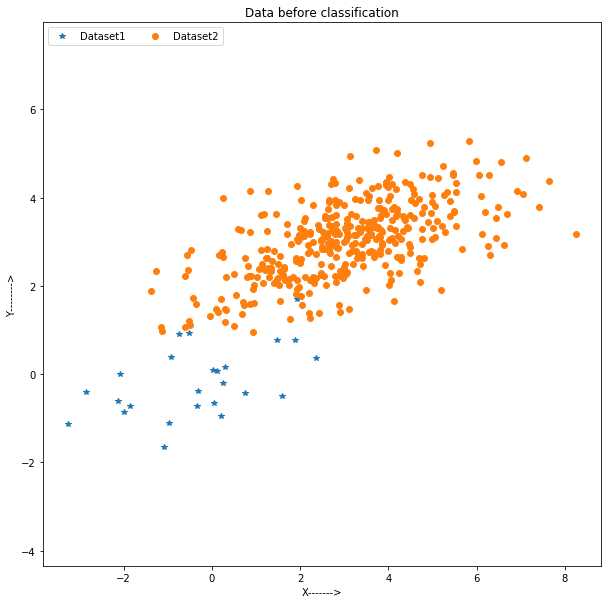

In [82]:
cov2=[[3,1],[1,0.8]]
plt.figure(figsize=(10,10))

x3=linear_transformation(mu1,cov2,n1)
x3_axis=x3[0,:]
y3_axis=x3[1,:]

x4=linear_transformation(mu2,cov2,n2)
x4_axis=x4[0,:]
y4_axis=x4[1,:]

plt.plot(x3_axis,y3_axis,'*',label='Dataset1');
plt.plot(x4_axis,y4_axis,'o',label='Dataset2');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()


Misclassifications of Dataset 1 = 3
Misclassifications of Dataset 2 = 0
probabilty of error  0.0075


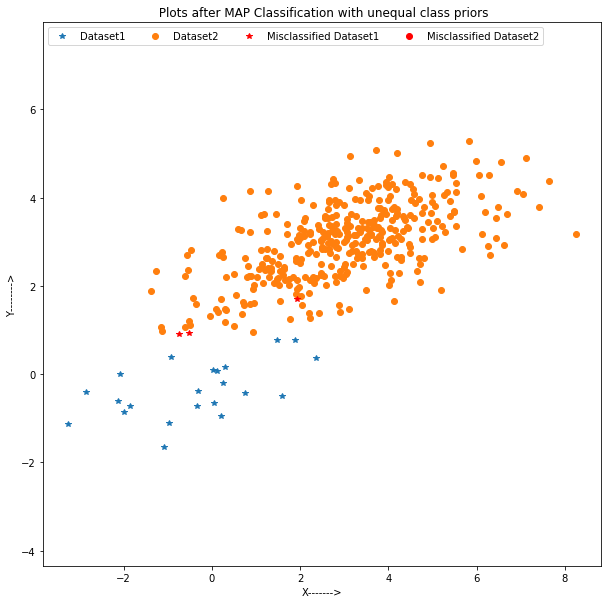

In [83]:
plt.figure(figsize=(10,10))

pw1=0.05
pw2=0.95

error3.clear()
error4.clear()

res3=[]
res4=[]

for i in range(n1):
    if(pdf(np.matrix(x3[:,i]), mu1, np.matrix(cov2))*pw1 > pdf(np.matrix(x3[:,i]), mu2, np.matrix(cov2))*pw2 ):
        res3.append(x3[:,i])
    else:
        error3.append(x3[:,i])
        
for i in range(n2):
    if(pdf(np.matrix(x4[:,i]), mu2, np.matrix(cov2))*pw2 > pdf(np.matrix(x4[:,i]), mu1, np.matrix(cov2))*pw1 ):
        res4.append(x4[:,i])
    else:
        error4.append(x4[:,i])
        
P_error=(len(error3)+len(error4))/400
print("Misclassifications of Dataset 1 =", len(error3))
print("Misclassifications of Dataset 2 =", len(error4))
print("probabilty of error ", P_error)

def column(matrix, i):
    return [row[i] for row in matrix]

plt.plot(column(res3,0),column(res3,1),'*',label='Dataset1');
plt.plot(column(res4,0),column(res4,1),'o',label='Dataset2');
plt.plot(column(error3,0),column(error3,1),'*',color='r',label='Misclassified Dataset1');
plt.plot(column(error4,0),column(error4,1),'o',color='r',label='Misclassified Dataset2');
plt.axis('equal')
plt.title(" Plots after MAP Classification with unequal class priors")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

### Map classifer with unequal class priors
#### 6. Same (3), but prior for class priors are 0.05 and 0.95

In [92]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.95])
n2=len([i for i in l if i <= 0.95])
print(n1,n2)

18 382


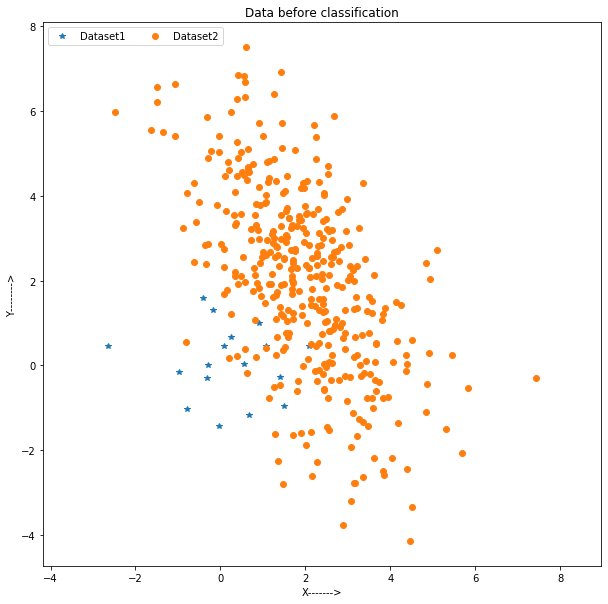

In [93]:
plt.figure(figsize=(10,10))
mu1=[0,0]
mu2=[2,2]

cov1=[[2,0.5],[0.5,1]]
cov2=[[2,-1.9],[-1.9,5]]

x5=linear_transformation(mu1,cov1,n1)
x5_axis=x5[0,:]
y5_axis=x5[1,:]

x6=linear_transformation(mu2,cov2,n2)
x6_axis=x6[0,:]
y6_axis=x6[1,:]

plt.plot(x5_axis,y5_axis,'*',label='Dataset1');
plt.plot(x6_axis,y6_axis,'o',label='Dataset2');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

Misclassifications of Dataset 1 = 11
Misclassifications of Dataset 2 = 3
probabilty of error  0.035


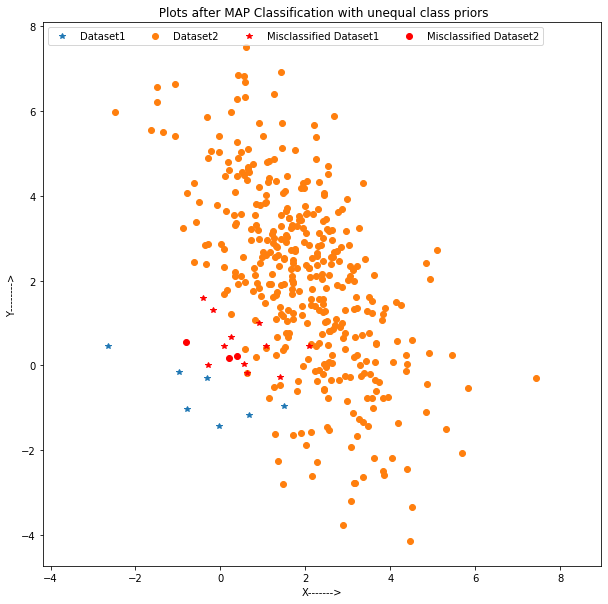

In [94]:
plt.figure(figsize=(10,10))
error5.clear()
error6.clear()

res5=[]
res6=[]

for i in range(n1):
    if(pdf(np.matrix(x5[:,i]), mu1, np.matrix(cov1))*pw1 > pdf(np.matrix(x5[:,i]), mu2, np.matrix(cov1))*pw2 ):
        res5.append(x5[:,i])
    else:
        error5.append(x5[:,i])
        
for i in range(n2):
    if(pdf(np.matrix(x6[:,i]), mu2, np.matrix(cov2))*pw2 > pdf(np.matrix(x6[:,i]), mu1, np.matrix(cov1))*pw1 ):
        res6.append(x6[:,i])
    else:
        error6.append(x6[:,i])
        
P_error=(len(error5)+len(error6))/400
print("Misclassifications of Dataset 1 =", len(error5))
print("Misclassifications of Dataset 2 =", len(error6))
print("probabilty of error ", P_error)

def column(matrix, i):
    return [row[i] for row in matrix]

plt.plot(column(res5,0),column(res5,1),'*',label='Dataset1');
plt.plot(column(res6,0),column(res6,1),'o',label='Dataset2');
plt.plot(column(error5,0),column(error5,1),'*',color='r',label='Misclassified Dataset1');
plt.plot(column(error6,0),column(error6,1),'o',color='r',label='Misclassified Dataset2');
plt.axis('equal')
plt.title(" Plots after MAP Classification with unequal class priors")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

## Question 3

### LDA classifier (1)

In [108]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.5])
n2=len([i for i in l if i <= 0.5])
print(n1,n2)

204 196


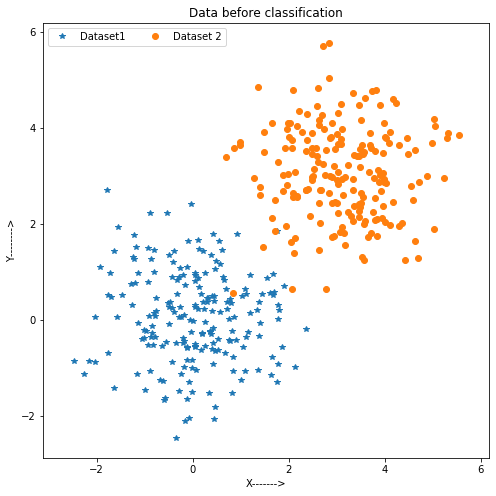

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math

plt.figure(figsize=(8,8))

mu1=[0,0];
mu2=[3,3];
cov=[[1,0],[0,1]]

N=400;
#generating the recquired samples using linear transformation techniques.

def linear_transformation(mu, cov, n):
    mean=[0,0]
    covariance=[[1,0],[0,1]]
    
    
    z = np.random.multivariate_normal(mean,covariance,n).T
    b = mu
    A = np.linalg.cholesky(cov)
    
    x=np.dot(A,z)
    
    for i in range(0,n):
        x[:,i]=x[:,i]+b
    
    return x

x1=linear_transformation(mu1,cov,n1)
x1_axis=x1[0,:]
y1_axis=x1[1,:]

x2=linear_transformation(mu2,cov,n2)
x2_axis=x2[0,:]
y2_axis=x2[1,:]

plt.plot(x1_axis,y1_axis,'*',label='Dataset1');
plt.plot(x2_axis,y2_axis,'o',label ='Dataset 2')
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()



Threshold value =  1.5108133460555229
Misclassifications of Dataset1 =  13
Misclassifications of Dataset2 =  9
Probability of error =  0.055


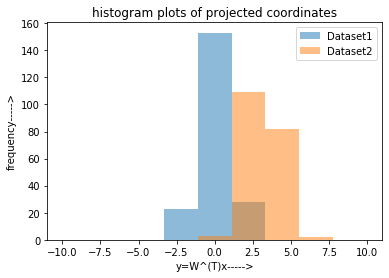

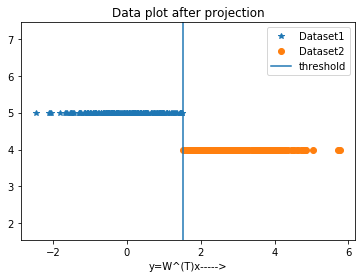

In [111]:
#plt.figure(figsize=(10,10))
mean1=np.array([np.mean(x1.T[:,0]), np.mean(x1.T[:,1])])
mean2=np.array([np.mean(x2.T[:,0]), np.mean(x2.T[:,1])])

Sb=np.cross((mean1-mean2),(mean1-mean2).T)
Sw=np.cov(x1)+np.cov(x2)

M=np.linalg.inv(Sw)*Sb

w,v=np.linalg.eig(M)
i=np.argmax(w)

W=v[i]

y1=[]
y2=[]

for i in range(n1):
    y1.append(np.cross(W.T,x1[:,i]))
for i in range(n2):
    y2.append(np.cross(W.T,x2[:,i]))
    
y_axis=[6 for x in range(400)]
proj_mean1=np.cross(W.T,mean1)
proj_mean2=np.cross(W.T,mean2)

th=y1+y2
resy1=[]
resy2=[]
P_error=[]

for x in range(len(th)):
        
    for i in range(n1):
        if(y1[i]<th[x]):
            resy1.append(y1[i])
        else:
            error1.append(y1[i])
    for i in range(n2):
        if(y2[i]>th[x]):
            resy2.append(y2[i])
        else:
            error2.append(y2[i])
    P_error.append((len(error1)+len(error2))/2)
    error1.clear()
    error2.clear()
#Calculating the the threshold for which we can obtain min error    
j=np.argmin(np.array(P_error))
print("Threshold value = ", th[j])

threshold=th[j]

resy1.clear()
resy2.clear()


error1.clear()
error2.clear()
for i in range(n1):
    if(y1[i]<threshold):
        resy1.append(y1[i])
    else:
        error1.append(y1[i])
for i in range(n2):
    if(y2[i]>threshold):
        resy2.append(y2[i])
    else:
        error2.append(y2[i])
        
p_error=(len(error1)+len(error2))/400


print("Misclassifications of Dataset1 = ", len(error1))
print("Misclassifications of Dataset2 = ", len(error2))
print("Probability of error = ",p_error)
        
bins = np.linspace(-10, 10, 10)

plt.hist(y1, bins, alpha=0.5, label='Dataset1')
plt.hist(y2, bins, alpha=0.5, label='Dataset2')
plt.legend(loc='upper right')
plt.title('histogram plots of projected coordinates')
plt.xlabel('y=W^(T)x----->')
plt.ylabel('frequency----->')
plt.show()

plt.plot(resy1,[5 for x in range(len(resy1))],'*',label='Dataset1')
plt.plot(resy2,[4 for x in range(len(resy2))],'o',label='Dataset2')
plt.title('Data plot after projection')
plt.xlabel('y=W^(T)x----->')

plt.axvline(x=threshold, label='threshold')
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()


### LDA classifier(2)

In [101]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.5])
n2=len([i for i in l if i <= 0.5])
print(n1,n2)

201 199


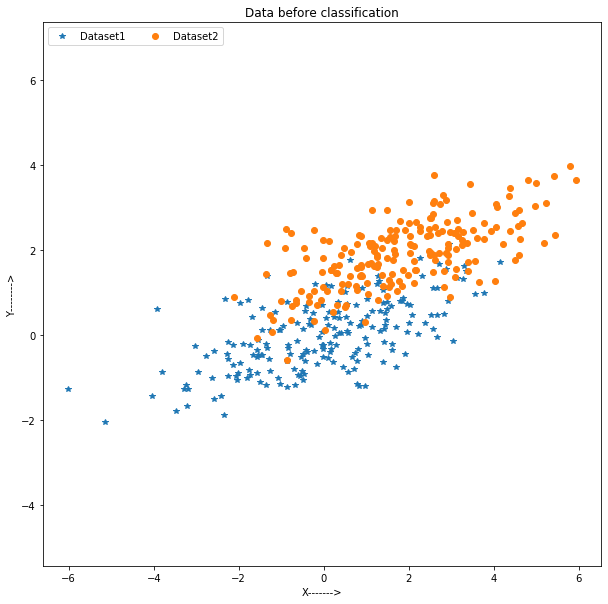

In [102]:
cov2=[[3,1],[1,0.8]]
plt.figure(figsize=(10,10))

x3=linear_transformation(mu1,cov2,n1)
x3_axis=x3[0,:]
y3_axis=x3[1,:]

x4=linear_transformation(mu2,cov2,n2)
x4_axis=x4[0,:]
y4_axis=x4[1,:]

plt.plot(x3_axis,y3_axis,'*',label='Dataset1');
plt.plot(x4_axis,y4_axis,'o',label='Dataset2');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()


Threshold value =  0.8680072795245712
Misclassifications of Dataset2 21
Misclassifications of Dataset1 27
Probability of error 0.12


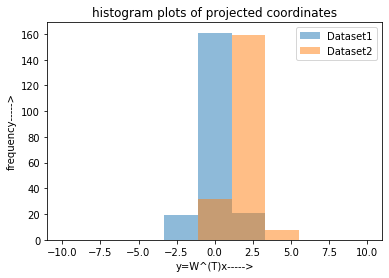

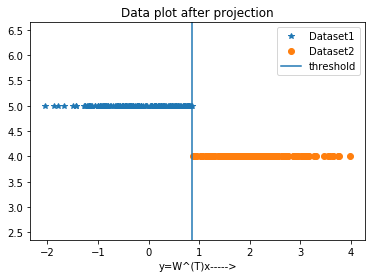

In [103]:
#plt.figure(figsize=(10,10))
mean1=np.array([np.mean(x3.T[:,0]), np.mean(x3.T[:,1])])
mean2=np.array([np.mean(x4.T[:,0]), np.mean(x4.T[:,1])])

Sb=np.cross((mean1-mean2),(mean1-mean2).T)
Sw=np.cov(x3)+np.cov(x4)

M=np.linalg.inv(Sw)*Sb

w,v=np.linalg.eig(M)
i=np.argmax(w)

W=v[i]

y1.clear()
y2.clear()

for i in range(n1):
    y1.append(np.cross(W.T,x3[:,i]))
for i in range(n2):
    y2.append(np.cross(W.T,x4[:,i]))
    
y_axis=[6 for x in range(400)]
proj_mean1=np.cross(W.T,mean1)
proj_mean2=np.cross(W.T,mean2)

th=y1+y2
resy1.clear()
resy2.clear()

P_error=[]

for x in range(len(th)):
        
    for i in range(n1):
        if(y1[i]<th[x]):
            resy1.append(y1[i])
        else:
            error1.append(y1[i])
    for i in range(n2):
        if(y2[i]>th[x]):
            resy2.append(y2[i])
        else:
            error2.append(y2[i])
    P_error.append((len(error1)+len(error2))/2)
    error1.clear()
    error2.clear()
#Calculating the the threshold for which we can obtain min error    
j=np.argmin(np.array(P_error))
print("Threshold value = ", th[j])

threshold=th[j]


resy1.clear()
resy2.clear()

error1.clear()
error2.clear()
for i in range(n1):
    if(y1[i]<threshold):
        resy1.append(y1[i])
    else:
        error1.append(y1[i])
for i in range(n2):
    if(y2[i]>threshold):
        resy2.append(y2[i])
    else:
        error2.append(y2[i])
        
p_error=(len(error1)+len(error2))/400

print("Misclassifications of Dataset2",len(error2))
print("Misclassifications of Dataset1", len(error1))
print("Probability of error",p_error)
        
bins = np.linspace(-10, 10, 10)

plt.hist(y1, bins, alpha=0.5, label='Dataset1')
plt.hist(y2, bins, alpha=0.5, label='Dataset2')
plt.legend(loc='upper right')
plt.title('histogram plots of projected coordinates')
plt.xlabel('y=W^(T)x----->')
plt.ylabel('frequency----->')
plt.show()

plt.plot(resy1,[5 for x in range(len(resy1))],'*',label='Dataset1')
plt.plot(resy2,[4 for x in range(len(resy2))],'o',label='Dataset2')
plt.axvline(x=threshold, label='threshold')
plt.title('Data plot after projection')
plt.xlabel('y=W^(T)x----->')
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()



### LDA classifier

In [104]:
l=[]
l=np.random.uniform(0,1,400)
n1=len([i for i in l if i >= 0.5])
n2=len([i for i in l if i <= 0.5])
print(n1,n2)

200 200


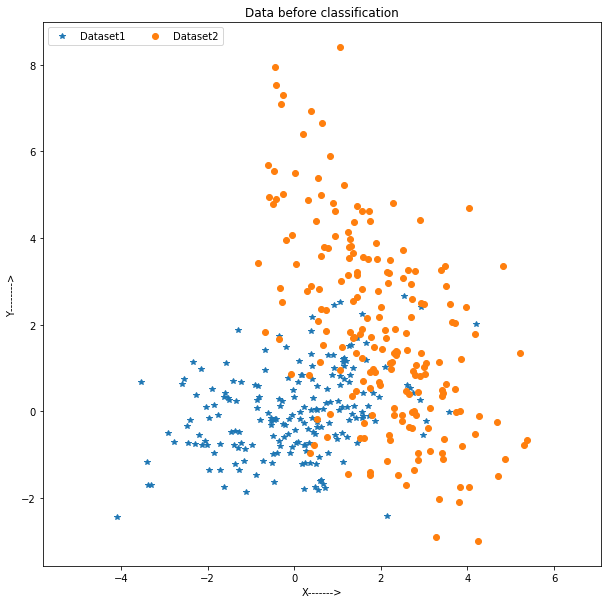

In [105]:
plt.figure(figsize=(10,10))
mu1=[0,0]
mu2=[2,2]

cov1=[[2,0.5],[0.5,1]]
cov2=[[2,-1.9],[-1.9,5]]

x5=linear_transformation(mu1,cov1,n1)
x5_axis=x5[0,:]
y5_axis=x5[1,:]

x6=linear_transformation(mu2,cov2,n2)
x6_axis=x6[0,:]
y6_axis=x6[1,:]

plt.plot(x5_axis,y5_axis,'*',label='Dataset1');
plt.plot(x6_axis,y6_axis,'o',label='Dataset2');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()

Threshold value =  0.8498521560368277
Misclassifications of Dataset1 =  36
Misclassifications of Dataset2 =  67
Probability of error =  0.2575


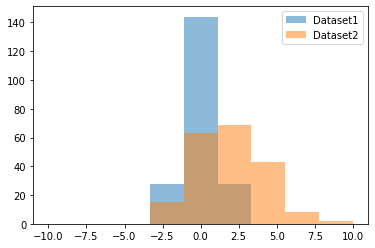

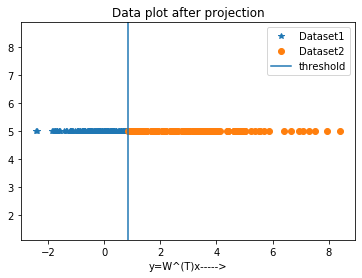

In [107]:
#plt.figure(figsize=(10,10))
mean1=np.array([np.mean(x5.T[:,0]), np.mean(x5.T[:,1])])
mean2=np.array([np.mean(x6.T[:,0]), np.mean(x6.T[:,1])])

Sb=np.cross((mean1-mean2),(mean1-mean2).T)
Sw=np.cov(x5)+np.cov(x6)

M=np.linalg.inv(Sw)*Sb

w,v=np.linalg.eig(M)
i=np.argmax(w)

W=v[i]

y1.clear()
y2.clear()

for i in range(n1):
    y1.append(np.cross(W.T,x5[:,i]))
for i in range(n2):
    y2.append(np.cross(W.T,x6[:,i]))
    
y_axis=[6 for x in range(400)]
proj_mean1=np.cross(W.T,mean1)
proj_mean2=np.cross(W.T,mean2)

resy1.clear()
resy2.clear()

th=y1+y2

P_error=[]

for x in range(len(th)):
        
    for i in range(n1):
        if(y1[i]<th[x]):
            resy1.append(y1[i])
        else:
            error1.append(y1[i])
    for i in range(n2):
        if(y2[i]>th[x]):
            resy2.append(y2[i])
        else:
            error2.append(y2[i])
            
    P_error.append((len(error1)+len(error2))/2)
    error1.clear()
    error2.clear()
#Calculating the the threshold for which we can obtain min error    
j=np.argmin(np.array(P_error))
print("Threshold value = ", th[j])

threshold=th[j]
resy1.clear()
resy2.clear()

error1.clear()
error2.clear()
for i in range(n1):
    if(y1[i]<threshold):
        resy1.append(y1[i])
    else:
        error1.append(y1[i])
for i in range(n2):
    if(y2[i]>threshold):
        resy2.append(y2[i])
    else:
        error2.append(y2[i])
        
p_error=(len(error1)+len(error2))/400

print("Misclassifications of Dataset1 = ", len(error1))
print("Misclassifications of Dataset2 = ", len(error2))
print("Probability of error = ",p_error)
        
bins = np.linspace(-10, 10, 10)

plt.hist(y1, bins, alpha=0.5, label='Dataset1')
plt.hist(y2, bins, alpha=0.5, label='Dataset2')
plt.legend(loc='upper right')
plt.show()

plt.plot(resy1,[5 for x in range(len(resy1))],'*',label='Dataset1')
plt.plot(resy2,[5 for x in range(len(resy2))],'o',label='Dataset2')
plt.title('Data plot after projection')
plt.xlabel('y=W^(T)x----->')

plt.axvline(x=threshold,label='threshold')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()


